In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

end_date = "2017-08-01"
start_date = dt.date(2017,8,1) - dt.timedelta(days=365)

trip_data = calc_temps(start_date, end_date)

print(trip_data)

[(58.0, 74.64288840262581, 87.0)]


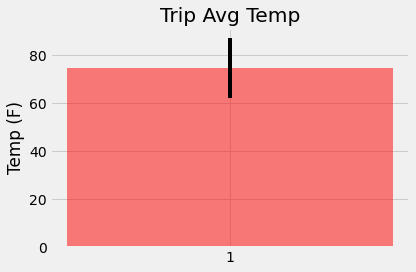

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

x_axis = "1"
y_axis = trip_data[0][1]
error= trip_data[0][2]-trip_data[0][1]

plt.bar(x_axis,y_axis, yerr=error, alpha=0.5, color="red",align='center')
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()

### Daily Rainfall Average

In [12]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [station.station, station.name, station.latitude, station.longitude,station.elevation, func.sum(measurement.prcp)]

station_rainfall= session.query(*sel).\
                    filter(station.station == measurement.station).\
                    filter(measurement.date >= start_date).\
                    filter(measurement.date <= end_date).\
                    group_by(station.name).order_by(func.sum(measurement.prcp).desc()).all()
                  
station_rainfall

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 157.91000000000005),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 79.49000000000005),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 54.39000000000004),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 39.800000000000004),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 34.25999999999999),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 17.199999999999992),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 4.77)]

### Daily Temperature Normals

In [13]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [14]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'



# Use the start and end date to create a range of dates
date_ranges = pd.date_range(start = start_date, end=end_date)

# Strip off the year and save a list of strings in the format %m-%d
date_list =date_ranges.strftime("%m-%d")
date_list




# Use the `daily_normals` function to calculate the normals for each date string 
normals =[]
for date in date_list:
    for tmin, tavg, tmax in daily_normals(date):
        normals_dict = {}
        normals_dict["tmin"] = tmin
        normals_dict["tavg"] = tavg
        normals_dict["tmax"] = tmax
        normals.append(normals_dict)
# and append the results to a list called `normals`.
normals

[{'tmin': 67.0, 'tavg': 75.54, 'tmax': 83.0},
 {'tmin': 68.0, 'tavg': 75.60377358490567, 'tmax': 84.0},
 {'tmin': 70.0, 'tavg': 76.61111111111111, 'tmax': 85.0},
 {'tmin': 69.0, 'tavg': 76.71153846153847, 'tmax': 84.0},
 {'tmin': 69.0, 'tavg': 76.14814814814815, 'tmax': 82.0},
 {'tmin': 67.0, 'tavg': 76.25, 'tmax': 83.0},
 {'tmin': 71.0, 'tavg': 77.15686274509804, 'tmax': 83.0}]

In [15]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals)
df["date"] = date_ranges.strftime("%Y-%m-%d")
df.set_index("date", inplace=True)
df

,tmin,tavg,tmax
date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


In [16]:
df.dtypes

tmin    float64
tavg    float64
tmax    float64
dtype: object

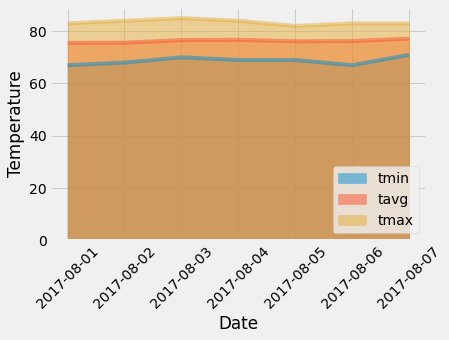

In [17]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot.area(rot=45,stacked=False)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend(loc="lower right")
plt.show()

## Close Session

In [18]:
session.close()